'orb' Datasets and Options
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.4 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.4,<2.5"

As always, let's do imports and initialize a logger and a new Bundle.

In [2]:
import phoebe
from phoebe import u # units

logger = phoebe.logger()

b = phoebe.default_binary()

Dataset Parameters
--------------------------

Let's add an orbit dataset to the Bundle (see also the [orb API docs](../api/phoebe.parameters.dataset.orb.md)).

In [3]:
b.add_dataset('orb')
print(b.get_dataset(kind='orb'))

ParameterSet: 3 parameters
      compute_times@orb01@dataset: [] d
C    compute_phases@orb01@dataset: []
          phases_t0@orb01@dataset: t0_supconj


### compute_times / compute_phases

See the [Compute Times & Phases tutorial](compute_times_phases.ipynb).

In [4]:
print(b.get_parameter(qualifier='compute_times'))

Parameter: compute_times@orb01@dataset
                       Qualifier: compute_times
                     Description: Times to use during run_compute.  If empty, will use times parameter
                           Value: [] d
                  Constrained by: 
                      Constrains: compute_phases@orb01@dataset
                      Related to: period@binary@component, dpdt@binary@component, phases_t0@orb01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component, compute_phases@orb01@dataset



In [5]:
print(b.get_parameter(qualifier='compute_phases', context='dataset'))

Parameter: compute_phases@orb01@dataset
                       Qualifier: compute_phases
                     Description: Phases associated with compute_times.
                           Value: []
                  Constrained by: compute_times@orb01@dataset, period@binary@component, dpdt@binary@component, phases_t0@orb01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component
                      Constrains: None
                      Related to: compute_times@orb01@dataset, period@binary@component, dpdt@binary@component, phases_t0@orb01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component



In [6]:
print(b.get_parameter(qualifier='phases_t0'))

Parameter: phases_t0@orb01@dataset
                       Qualifier: phases_t0
                     Description: t0 to use when converting between compute_times and compute_phases as well as when applying mask_phases
                           Value: t0_supconj
                         Choices: t0_supconj, t0_perpass, t0_ref
                  Constrained by: 
                      Constrains: compute_phases@orb01@dataset
                      Related to: compute_times@orb01@dataset, period@binary@component, dpdt@binary@component, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component, compute_phases@orb01@dataset
                 Only visible if: hierarchy.is_meshable:False



Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to dynamics and the ORB dataset

In [7]:
print(b.get_compute())

ParameterSet: 17 parameters
     sample_from@phoebe01@compute: []
        comments@phoebe01@compute: 
   dynamics_method@phoebe01@co...: keplerian
            ltte@phoebe01@compute: False
    irrad_method@phoebe01@compute: horvat
   boosting_method@phoebe01@co...: none
   eclipse_method@phoebe01@com...: native
   horizon_method@phoebe01@com...: boolean
   mesh_method@primary@phoebe0...: marching
   mesh_method@secondary@phoeb...: marching
   ntriangles@primary@phoebe01...: 1500
   ntriangles@secondary@phoebe...: 1500
   distortion_method@primary@p...: roche
   distortion_method@secondary...: roche
     atm@primary@phoebe01@compute: ck2004
   atm@secondary@phoebe01@compute: ck2004
         enabled@phoebe01@compute: True


### dynamics_method

In [8]:
print(b.get_parameter(qualifier='dynamics_method'))

Parameter: dynamics_method@phoebe01@compute
                       Qualifier: dynamics_method
                     Description: Which method to use to determine the dynamics of components
                           Value: keplerian
                         Choices: keplerian
                  Constrained by: 
                      Constrains: None
                      Related to: None



The `dynamics_method` parameter controls how stars and components are placed in the coordinate system as a function of time and has several choices:
 * keplerian (default): Use Kepler's laws to determine positions.  If the system has more than two components, then each orbit is treated independently and nested (ie there are no dynamical/tidal effects - the inner orbit is treated as a single point mass in the outer orbit).
 * nbody: Use an n-body integrator to determine positions.  Here the initial conditions (positions and velocities) are still defined by the orbit's Keplerian parameters at 't0@system'.  Closed orbits and orbital stability are not guaranteed and ejections can occur.

### ltte

In [9]:
print(b.get_parameter(qualifier='ltte'))

Parameter: ltte@phoebe01@compute
                       Qualifier: ltte
                     Description: Correct for light travel time effects
                           Value: False
                  Constrained by: 
                      Constrains: None
                      Related to: None



The `ltte` parameter sets whether light travel time effects (Roemer delay) are included.  If set to False, the positions and velocities are returned as they actually are for that given object at that given time.  If set to True, they are instead returned as they were or will be when their light reaches the origin of the coordinate system.

See the [ltte tutorial](../ltte.ipynb) as well as the [Systemic Velocity Example Script](../examples/vgamma.ipynb) for an example of how 'ltte' and 'vgamma' (systemic velocity) interplay.

Synthetics
------------------

In [10]:
b.set_value_all('compute_times', phoebe.linspace(0,3,201))

In [11]:
b.run_compute()

100%|██████████| 201/201 [00:00<00:00, 5306.51it/s]


<ParameterSet: 15 parameters | components: primary, secondary>

In [12]:
print(b.filter(context='model').twigs)

['times@primary@orb01@phoebe01@latest@orb@model', 'us@primary@orb01@phoebe01@latest@orb@model', 'vs@primary@orb01@phoebe01@latest@orb@model', 'ws@primary@orb01@phoebe01@latest@orb@model', 'vus@primary@orb01@phoebe01@latest@orb@model', 'vvs@primary@orb01@phoebe01@latest@orb@model', 'vws@primary@orb01@phoebe01@latest@orb@model', 'times@secondary@orb01@phoebe01@latest@orb@model', 'us@secondary@orb01@phoebe01@latest@orb@model', 'vs@secondary@orb01@phoebe01@latest@orb@model', 'ws@secondary@orb01@phoebe01@latest@orb@model', 'vus@secondary@orb01@phoebe01@latest@orb@model', 'vvs@secondary@orb01@phoebe01@latest@orb@model', 'vws@secondary@orb01@phoebe01@latest@orb@model', 'comments@phoebe01@latest@model']


In [13]:
print(b.get_parameter(qualifier='times', component='primary', kind='orb', context='model'))

Parameter: times@primary@latest@model
                       Qualifier: times
                     Description: Model (synthetic) times
                           Value: [0.    0.015 0.03  ... 2.97  2.985 3.   ] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [14]:
print(b.get_parameter(qualifier='us', component='primary', kind='orb', context='model'))

Parameter: us@primary@latest@model
                       Qualifier: us
                     Description: U position
                           Value: [ 1.62265701e-16 -2.49387030e-01 -4.96560484e-01 ...
  4.96560484e-01  2.49387030e-01 -2.19140711e-15] solRad
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [15]:
print(b.get_parameter(qualifier='vus', component='primary', kind='orb', context='model'))

Parameter: vus@primary@latest@model
                       Qualifier: vus
                     Description: U velocity
                           Value: [-134.07073898 -133.4757283  -131.6959776  ... -131.6959776
 -133.4757283  -134.07073898] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None



Plotting
---------------

By default, orb datasets plot as 'vs' vx 'us' (plane of sky coordinates).  Notice the y-scale here with inclination set to 90.

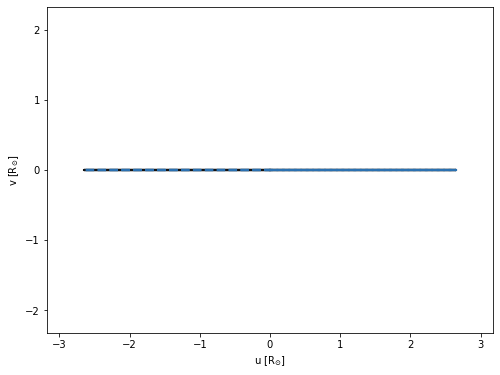

In [16]:
afig, mplfig = b.plot(show=True)

As always, you have access to any of the arrays for either axes, so if you want to plot 'vus' vs 'times'

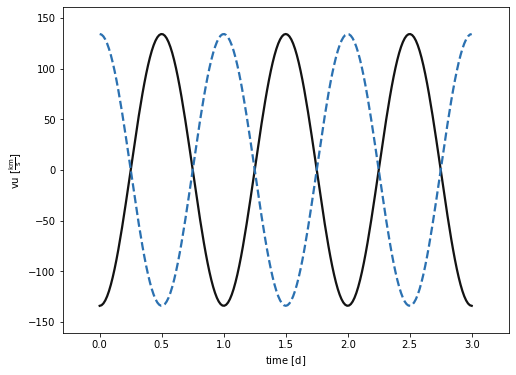

In [17]:
afig, mplfig = b.plot(x='times', y='vus', show=True)

We can also plot the orbit in 3D.

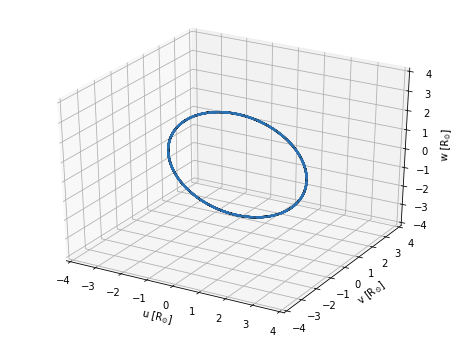

In [18]:
afig, mplfig = b.plot(projection='3d', xlim=(-4,4), ylim=(-4,4), zlim=(-4,4), show=True)